In [23]:
import gymnasium as gym
import numpy as np
from matplotlib import pyplot as plt

In [24]:
# CartPole environment
env = gym.make('CartPole-v1')

# Parameters
num_episodes = 1000
max_steps_per_episode = 200
learning_rate = 0.1
discount_factor = 0.99
exploration_prob = 0.3

In [25]:
# Define feature vector function
def get_features(states, action):
    # You can design your feature representation here based on states and action
    return np.append(states, action)


# Epsilon-greedy action selection
def select_action_epsilon_greedy(states, weights, epsilon):
    if np.random.rand() < epsilon:
        return env.action_space.sample()
    else:
        q_values = [np.dot(weights, get_features(states, a)) for a in range(env.action_space.n)]
        return np.argmax(q_values)

# Linear Sarsa update
def update_weights_sarsa(states, action, reward, next_states, next_action, weights):
    q_value = np.dot(weights, get_features(states, action))
    next_q_value = np.dot(weights, get_features(next_states, next_action))
    td_error = reward + discount_factor * next_q_value - q_value
    weights += learning_rate * td_error * get_features(states, action)




In [26]:
# Initialize weights for linear approximation
states, info = env.reset()
num_features = len(get_features(states, 0))
weights = np.zeros(num_features)

# Training loop
rewards = np.array([])
for episode in range(num_episodes):
    states, info = env.reset()
    action = select_action_epsilon_greedy(states, weights, exploration_prob)

    for step in range(max_steps_per_episode):
        next_states, reward, terminated, truncated, info = env.step(action)
        next_action = select_action_epsilon_greedy(next_states, weights, exploration_prob)

        update_weights_sarsa(states, action, reward, next_states, next_action, weights)

        if terminated or truncated:
            rewards = np.append(rewards, step + 1)
            break

        states = next_states
        action = next_action
env.close()

In [27]:
env = gym.make('CartPole-v1', render_mode="human") # Visible

try:
    states, info = env.reset()
    action = select_action_epsilon_greedy(states, weights, exploration_prob)

    for step in range(max_steps_per_episode):
        env.render()

        next_states, reward, terminated, truncated, info = env.step(action)
        next_action = select_action_epsilon_greedy(next_states, weights, exploration_prob)

        update_weights_sarsa(states, action, reward, next_states, next_action, weights)

        if terminated or truncated:
            break

        states = next_states
        action = next_action
finally:
    env.close()

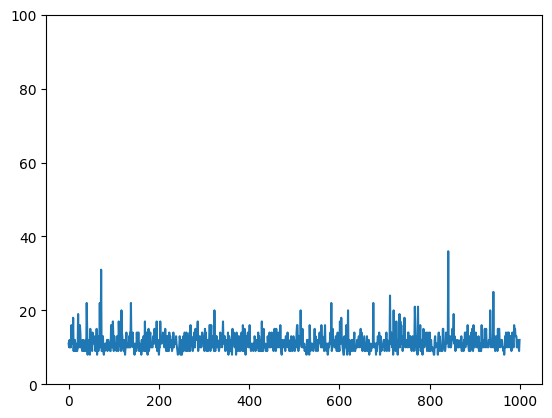

In [28]:
plt.ylim(0, 100)
plt.plot(rewards)
plt.show()